# Final Project: Global Football Data Analysis

This is the final project for the course **"Programming for Data Science"** at the **Faculty of Information Technology**, **University of Science, Vietnam National University, Ho Chi Minh City**.

---

**Instructor:** Phạm Trọng Nghĩa  

**Course:** Programming for Data Science  

**Date:** 12/2024

---

## Project Overview

- Với độ phủ sóng toàn cầu, bóng đá từ lâu đã được coi là môn thể thao vua và được ví như một ngôn ngữ chung để kết nối hàng triệu con người. Trải qua lịch sử hàng trăm năm hình thành và phát triển, môn thể thao vua không chỉ là sân chơi của các cầu thủ tài năng mà còn là biểu tượng của niềm đam mê, sự đoàn kết và những khoảnh khắc không thể nào quên.
- Là những người yêu thích bóng đá, nhóm chúng em đã tìm đến bộ dữ liệu **"Kết quả bóng đá quốc tế từ 1872 đến 2024"** với mong muốn khám phá và phân tích bức tranh toàn cảnh về bóng đá nam toàn cầu.
- Mục tiêu của đồ án không chỉ dừng lại ở việc phân tích các xu hướng và yếu tố ảnh hưởng đến kết quả của các đội tuyển quốc gia mà còn mở rộng sang việc dự đoán những xu hướng mới. Chúng em mong muốn trả lời câu hỏi: ***"Đâu sẽ là các đội tuyển thống trị bóng đá nam toàn cầu trong thập kỷ tới?"***
- Thông qua việc áp dụng các phương pháp trong quy trình khoa học dữ liệu, đồ án hy vọng sẽ đạt được mục tiêu và đóng góp một góc nhìn thú vị, hữu ích cho cộng đồng yêu bóng đá.

---

## GitHub Repository

Truy cập toàn bộ dự án trên GitHub:

- [Global Football Data Analysis Repository](https://github.com/trgtanhh04/Programming4DS_Final)

---

## Import

In [1]:
import requests
import numpy as np
import pandas as pd
from typing import List
import os
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.robotparser

---

## Data collecting

### What is the subject of your data?

- Như đã đề cập ở phần Tổng quan, trong đồ án này chúng em sử dụng bộ dữ liệu **"Kết quả bóng đá quốc tế từ 1872 đến 2024"**.
- Bộ dữ liệu này bao gồm gần 48.000 kết quả của các trận đấu bóng đá quốc tế bắt đầu từ trận đấu chính thức đầu tiên vào năm 1872 cho đến năm 2024. Các trận đấu trải dài từ FIFA World Cup đến FIFI Wild Cup cho đến các trận giao hữu thông thường.
- Các trận đấu này hoàn toàn là trận đấu quốc tế dành cho nam, không bao gồm Thế vận hội hoặc các trận đấu mà ít nhất một trong các đội là đội B, U-23 hoặc đội tuyển chọn của giải đấu.

### What is the source of your data?

Dữ liệu được lấy từ Kaggle, có tại:

- [International Football Results Dataset](https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017?select=shootouts.csv)


### Do the authors of this data allow you to use it like this?

Tác giả của dữ liệu này cho phép sử dụng theo **Giấy phép dữ liệu mở** (hoặc các giấy phép cụ thể khác tùy thuộc vào nguồn dữ liệu). Có thể kiểm tra giấy phép dữ liệu tại liên kết sau:

- [Data License from Kaggle](https://creativecommons.org/publicdomain/zero/1.0/)

### How did the authors collect the data?

- Dữ liệu được tác giả thu thập từ nhiều nguồn, bao gồm Wikipedia, rsssf.com và các trang web của từng hiệp hội bóng đá.
- Tác giả đã tổ chức dữ liệu thu thập được thành 3 bộ dữ liệu: `results.csv`, `goalscorers.csv` và `shootouts.csv`.

---

## Exploring data

### Read raw data from file

In [2]:
raw_goal_scorers = pd.read_csv("Data/goalscorers.csv")
raw_results = pd.read_csv("Data/results.csv")
raw_shootouts = pd.read_csv("Data/shootouts.csv")

In [3]:
raw_goal_scorers.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [4]:
raw_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
raw_shootouts.head()

,date,home_team,away_team,winner,first_shooter
0,1967-08-22,India,Taiwan,Taiwan,NaN
1,1971-11-14,South Korea,Vietnam Republic,South Korea,NaN
2,1972-05-07,South Korea,Iraq,Iraq,NaN
3,1972-05-17,Thailand,South Korea,South Korea,NaN
4,1972-05-19,Thailand,Cambodia,Thailand,NaN


### How many rows and how many columns?

Chúng ta sẽ tính toán số hàng và cột của 3 DataFrames `raw_goal_scorers`, `raw_results` và `raw_shootouts`. Sau đó, lưu trữ nó trong biến `shape_goal_scorers`, `shape_results` và `shape_shootouts`

In [6]:
shape_goal_scorers = raw_goal_scorers.shape
shape_results = raw_results.shape
shape_shootouts = raw_shootouts.shape

In [7]:
print(f"Goal scorers shape: {shape_goal_scorers}")
print(f"Results shape: {shape_results}")
print(f"Shootouts shape: {shape_shootouts}")

Goal scorers shape: (44362, 8)
Results shape: (47917, 9)
Shootouts shape: (645, 5)


### What does each line mean? Does it matter if the lines have different meanings?

- Tất cả các dòng trong các file CSV này đều mô tả các trận đấu bóng đá từ các khía cạnh khác nhau: bàn thắng ghi được, kết quả trận đấu và các trận đấu có loạt sút penalty. Mỗi dòng cung cấp các thông tin chi tiết giúp ta phân tích và theo dõi các trận đấu, cầu thủ ghi bàn, tỉ số, và những chi tiết đặc biệt như sút penalty.
- Việc các dòng trong mỗi file phải có ý nghĩa và cấu trúc nhất quán theo từng cột là rất quan trọng. Điều này đảm bảo tính toàn vẹn của dữ liệu, tránh các lỗi phân tích và cho phép xử lý dữ liệu một cách suôn sẻ. Nếu dữ liệu trong một file bị trộn lẫn giữa các loại thông tin khác nhau, nó sẽ làm mất đi mục đích của dữ liệu và dẫn đến các kết luận sai lệch hoặc phân tích không chính xác.

### Notes:

Một số lưu ý quan trọng từ tác giả:
- Đối với đội chủ nhà `(home_team)` và đội khách `(away_team)`, tên hiện tại của đội sẽ được sử dụng. Ví dụ, vào năm 1882, khi một đội tự gọi mình là Ireland thi đấu với Anh, trong tập dữ liệu này, đội đó được gọi là Bắc Ireland vì đội Bắc Ireland hiện tại là đội kế thừa của đội Ireland năm 1882. Việc này được thực hiện để dễ theo dõi lịch sử và số liệu thống kê của các đội hơn.
- Đối với tên quốc gia `(country)`, tên quốc gia tại thời điểm diễn ra trận đấu sẽ được sử dụng. Vì vậy, khi Ghana chơi ở Accra, Gold Coast vào những năm 1950, mặc dù tên của đội chủ nhà và quốc gia không trùng nhau, nhưng đó vẫn là trận đấu trên sân nhà của Ghana. Điều này được biểu thị bằng cột trung lập `(neutral)`, ghi là SAI **(FALSE)** đối với những trận đấu đó, nghĩa là trận đấu không diễn ra ở địa điểm trung lập.


### Does the raw data have duplicate rows?

Chúng ta sẽ tính toán số hàng có chỉ mục trùng lặp và lưu trữ trong biến `goal_scorers_duplicated`, `results_duplicated` và `shootouts_duplicated`.

In [8]:
goal_scorers_duplicated = len(raw_goal_scorers[raw_goal_scorers.duplicated()])
results_duplicated = len(raw_results[raw_results.duplicated()])
shootouts_duplicated = len(raw_shootouts[raw_shootouts.duplicated()])

In [9]:
def check_duplicates(file_name, duplicated_count):
    if duplicated_count == 0:
        print(f"{file_name} data have no duplicated line.!")
    else:
        ext = "lines" if duplicated_count > 1 else "line"
        print(f"{file_name} data have {duplicated_count} duplicated {ext}!")

# Kiểm tra từng file
check_duplicates("Goal scorers", goal_scorers_duplicated)
check_duplicates("Results", results_duplicated)
check_duplicates("Shootouts", shootouts_duplicated)

Goal scorers data have 82 duplicated lines!
Results data have no duplicated line.!
Shootouts data have no duplicated line.!


In [10]:
# Loại bỏ các dòng trùng lặp của Goal scores
raw_goal_scorers.drop_duplicates(keep=False, inplace=True)

### What does each column mean?

Dưới đây là các bảng mô tả dữ liệu từ ba tệp CSV: **Goal Scorers**, **Results** và **Shootouts**.

<table style="width:48%; float:left; padding-right:10px; border: 1px solid black; border-collapse: collapse;">
  <caption><strong>Goal Scorers</strong></caption>
  <tr>
    <th style="border: 1px solid black;">Column</th>
    <th style="border: 1px solid black;">Description</th>
  </tr>
  <tr>
    <td style="border: 1px solid black;">date</td>
    <td style="border: 1px solid black;">Ngày diễn ra trận đấu.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">home_team</td>
    <td style="border: 1px solid black;">Tên đội chủ nhà.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">away_team</td>
    <td style="border: 1px solid black;">Tên đội khách.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">team</td>
    <td style="border: 1px solid black;">Tên đội ghi bàn thắng.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">scorer</td>
    <td style="border: 1px solid black;">Tên của cầu thủ ghi bàn.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">minute</td>
    <td style="border: 1px solid black;">Phút ghi bàn.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">own_goal</td>
    <td style="border: 1px solid black;">Liệu bàn thắng có phải là phản lưới nhà không.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">penalty</td>
    <td style="border: 1px solid black;">Liệu bàn thắng có phải là quả phạt đền không.</td>
  </tr>
</table>

<table style="width:48%; float:left; border: 1px solid black; border-collapse: collapse;">
  <caption><strong>Results</strong></caption>
  <tr>
    <th style="border: 1px solid black;">Column</th>
    <th style="border: 1px solid black;">Description</th>
  </tr>
  <tr>
    <td style="border: 1px solid black;">date</td>
    <td style="border: 1px solid black;">Ngày diễn ra trận đấu.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">home_team</td>
    <td style="border: 1px solid black;">Tên đội chủ nhà.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">away_team</td>
    <td style="border: 1px solid black;">Tên đội khách.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">home_score</td>
    <td style="border: 1px solid black;">Tỷ số toàn trận của đội chủ nhà bao gồm cả hiệp phụ, không bao gồm loạt sút penalty.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">away_score</td>
    <td style="border: 1px solid black;">Tỷ số toàn trận của đội khách bao gồm cả hiệp phụ, không bao gồm loạt sút penalty.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">tournament</td>
    <td style="border: 1px solid black;">Tên giải đấu.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">city</td>
    <td style="border: 1px solid black;">Thành phố nơi diễn ra trận đấu.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">country</td>
    <td style="border: 1px solid black;">Quốc gia nơi diễn ra trận đấu.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">neutral</td>
    <td style="border: 1px solid black;">Cột True/False cho biết trận đấu có diễn ra tại sân trung lập (không phải sân nhà của đội nào) hay không.</td>
  </tr>
</table>

<br style="clear: both;">

<table style="width:48%; float:left; padding-right:10px; border: 1px solid black; border-collapse: collapse;">
  <caption><strong>Shootouts</strong></caption>
  <tr>
    <th style="border: 1px solid black;">Column</th>
    <th style="border: 1px solid black;">Description</th>
  </tr>
  <tr>
    <td style="border: 1px solid black;">date</td>
    <td style="border: 1px solid black;">Ngày diễn ra trận đấu.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">home_team</td>
    <td style="border: 1px solid black;">Tên đội chủ nhà.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">away_team</td>
    <td style="border: 1px solid black;">Tên đội khách.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">winner</td>
    <td style="border: 1px solid black;">Tên đội thắng cuộc trong loạt sút penalty.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">first_shooter</td>
    <td style="border: 1px solid black;">Tên đội thực hiện cú sút luân lưu đầu tiên.</td>
  </tr>
</table>


### What data type does each column currently have? Are there any columns whose data types are not suitable for further processing?

Chúng ta sẽ tính toán kiểu dữ liệu (dtype) của mỗi cột trong DataFrame `raw_goal_scorers`, `raw_results`, `raw_shootouts` và lưu kết quả vào Series `dtypes_goal_scorers`, `dtypes_results`, `dtypes_shootouts` (Series này có chỉ mục là tên cột).

In [11]:
dtypes_dicts = {}

def get_dtype(raw_df):
    dtypes_dict = {}
    for column in raw_df.columns:
        dtypes_dict[column] = raw_df[column].dtype
    return dtypes_dict

# Tạo các dataframe và lưu lại dtypes vào dictionary
dtypes_dicts['goal_scorers'] = get_dtype(raw_goal_scorers)
dtypes_dicts['results'] = get_dtype(raw_results)
dtypes_dicts['shootouts'] = get_dtype(raw_shootouts)

# Chuyển các dictionary thành DataFrame
dtypes_goal_scorers = pd.DataFrame(dtypes_dicts['goal_scorers'].items(), columns=['Column Name', 'Data Type']).set_index('Column Name')
dtypes_results = pd.DataFrame(dtypes_dicts['results'].items(), columns=['Column Name', 'Data Type']).set_index('Column Name')
dtypes_shootouts = pd.DataFrame(dtypes_dicts['shootouts'].items(), columns=['Column Name', 'Data Type']).set_index('Column Name')

In [12]:
dtypes_goal_scorers

,Data Type
Column Name,
date,object
home_team,object
away_team,object
team,object
scorer,object
minute,float64
own_goal,bool
penalty,bool


In [13]:
dtypes_results

,Data Type
Column Name,
date,object
home_team,object
away_team,object
home_score,int64
away_score,int64
tournament,object
city,object
country,object
neutral,bool


In [14]:
dtypes_shootouts

,Data Type
Column Name,
date,object
home_team,object
away_team,object
winner,object
first_shooter,object


### For each column with numeric data type, how are the values distributed? 

Đối với các cột có kiểu dữ liệu số, ta sẽ tính toán:
- Percentage of missing values (tỷ lệ phần trăm (từ 0 đến 100) các giá trị bị thiếu)
- The min (giá trị nhỏ nhất)
- The lower quartile (tứ phân vị dưới)
- The median (trung vị)
- The upper quartile (tứ phân vị trên)
- The max (giá trị lớn nhất)

Vì dataframe `raw_shootouts` không có cột nào có kiểu dữ liệu số nên ta không cần làm việc với nó ở phần này.

Ta sẽ lưu kết quả vào từng DataFrame `goal_scores_num_col_info_df` và `results_num_col_info_df`, trong đó:
- Tên của các cột là tên của các cột số trong `raw_goal_scores` và `raw_results`
- Tên của các hàng: "missing_ratio", "min", 
"lower_quartile", "median", "upper_quartile", "max"

Để dễ dàng xem, bạn làm tròn tất cả các giá trị đến 1 chữ số thập phân bằng phương pháp `.round(1)`.

In [15]:
def missing_ratio(col):
    return (col.isna().mean() * 100)

def lower_quartile(col):
    return (col.quantile(0.25))

def median(col):
    return (col.median())

def upper_quartile(col):
    return (col.quantile(0.75))

**DataFrame** `raw_goal_scores`

In [16]:
goal_scores_num_col_info = raw_goal_scorers.select_dtypes(include=np.number)
goal_scores_num_col_info = goal_scores_num_col_info.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
goal_scores_num_col_info = goal_scores_num_col_info.round(1)
goal_scores_num_col_info

,minute
missing_ratio,0.3
min,1.0
lower_quartile,28.0
median,51.0
upper_quartile,73.0
max,122.0


**Nhận xét:** dữ liệu của cột `minute` rất tốt, phân bổ hợp lý với thời gian của một trận đấu quốc tế.

**DataFrame** `raw_results`

In [17]:
results_num_col_info = raw_results.select_dtypes(include=np.number)
results_num_col_info = results_num_col_info.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
results_num_col_info = results_num_col_info.round(1)
results_num_col_info

,home_score,away_score
missing_ratio,0.0,0.0
min,0.0,0.0
lower_quartile,1.0,0.0
median,1.0,1.0
upper_quartile,2.0,2.0
max,31.0,21.0


**Nhận xét:** dữ liệu của cột `home_score` & `away_score` rất tốt, phân bổ hợp lý với tỉ số các trận đấu quốc tế từng được ghi nhận.

### For each categorical column, how are the values distributed?

Đối với các cột có kiểu dữ liệu không phải số:
- Tỷ lệ phần trăm (từ 0 đến 100) các giá trị bị thiếu
- Số lượng giá trị (các giá trị ở đây là các giá trị khác nhau và chúng tôi không xem xét các giá trị bị thiếu): với các cột có kiểu là phân loại, thì đó là một tập hợp có số lượng danh mục hữu hạn. Việc đếm trực tiếp số lượng giá trị trong các cột này không có nhiều ý nghĩa, vì vậy tốt hơn là đếm số lượng phần tử của tất cả các kiểu. (Số lượng giá trị (các giá trị ở đây là các giá trị khác nhau và ta không đánh giá giá trị thiếu): với cột mà có loại là phân loại, nó là một tập hợp có số lượng hữu hạn các loại. Việc đếm trực tiếp số lượng giá trị trong những cột này không có nhiều ý nghĩa, nên tốt hơn hết là sẽ đếm số lượng các loại tử tử.)
- Tỷ lệ phần trăm (từ 0 đến 100) của mỗi giá trị được sắp xếp theo tỷ lệ phần trăm giảm dần (không xét giá trị thiếu, tỷ lệ là tỷ lệ so với số giá trị không thiếu): bạn dùng từ điển để lưu trữ, key là giá trị, value là phần trăm; Với cột tương ứng với từng loại, cách thực hiện tương tự như trên.

Ta sẽ lưu kết quả vào DataFrame `cat_col_info_df`, trong đó:
- Tên các cột là tên các cột không phải số trong `raw_df`
- Tên các dòng là: “missing_ratio”, “num_values”, “value_ratios”

**File** `raw_results`

In [18]:
# Chọn các cột kiểu categorical 
cate_cols = raw_results.select_dtypes(exclude=['number']).columns
cate_col_info = {}

for col in cate_cols:
    # Tỉ lệ giá trị NaN
    missing_ratio = raw_results[col].isna().mean() * 100
    # Số lượng giá trị duy nhất
    num_value = raw_results[col].nunique()
    # Phần trăm giá trị duy nhất
    value_counts = raw_results[col].value_counts(dropna = True)
    value_ratios = (value_counts / value_counts.sum()) * 100
    cate_col_info[col] = {
        'missing_ratio': missing_ratio,
        'num_value': num_value,
        'value_ratio': value_ratios
    }
# Chuyển thành dataframe
cate_col_info_df = pd.DataFrame.from_dict(cate_col_info, orient = 'index')
cate_col_info_df

,missing_ratio,num_value,value_ratio
date,0.0,16228,2012-02-29 0.137738 2016-03-29 0.133564 ...
home_team,0.0,327,Brazil 1.262600 Argentina 1.24173...
away_team,0.0,321,Uruguay 1.199992 Sweden 1.162427 En...
tournament,0.0,176,Friendly 37.648...
city,0.0,2080,Kuala Lumpur 1.523468 Bangkok 1.197...
country,0.0,270,United States 2.936327 France ...
neutral,0.0,2,False 73.687835 True 26.312165 Name: ne...


- Nhận xét: Dữ liệu từ results.csv rất tốt vì không có dữ liệu nào bị mất. Phân bổ dữ liệu cũng rất hợp lý


**File** `raw_goalscores`

In [19]:
# Chọn các cột kiểu categorical 
cate_cols = raw_goal_scorers.select_dtypes(exclude=['number']).columns
cate_col_info = {}

for col in cate_cols:
    # Tỉ lệ giá trị NaN
    missing_ratio = raw_goal_scorers[col].isna().mean() * 100
    # Số lượng giá trị duy nhất
    num_value = raw_goal_scorers[col].nunique()
    # Phần trăm giá trị duy nhất
    value_counts = raw_goal_scorers[col].value_counts(dropna = True)
    value_ratios = (value_counts / value_counts.sum()) * 100
    cate_col_info[col] = {
        'missing_ratio': missing_ratio,
        'num_value': num_value,
        'value_ratio': value_ratios
    }
# Chuyển thành dataframe
cate_col_info_df = pd.DataFrame.from_dict(cate_col_info, orient = 'index')
cate_col_info_df

,missing_ratio,num_value,value_ratio
date,0.000000,4630,2011-10-11 0.327802 2008-10-11 0.307456 ...
home_team,0.000000,220,Brazil 2.312701 Argentina ...
away_team,0.000000,220,Uruguay 1.779174 Paraguay 1.4...
team,0.000000,220,Brazil 2.376000 Germany 2.2...
scorer,0.006782,14324,Cristiano Ronaldo 0.244173 Robert Lewand...
own_goal,0.000000,2,False 98.143962 True 1.856038 Name: ow...
penalty,0.000000,2,False 93.303793 True 6.696207 Name: pe...


- Nhận xét: Dữ liệu từ `goalscorers.csv` rất tốt vì chỉ có ở cột người ghi bàn ở một trận có kết quả 0-0 là NaN, đó là điều bình thường, còn lại không có dữ liệu nào bị mất. Phần bổ dữ liệu cũng rất hợp lý.

**Xét** `raw_shootouts`


In [20]:
# Chọn các cột kiểu categorical 
cate_cols = raw_shootouts.select_dtypes(exclude=['number']).columns
cate_col_info = {}

for col in cate_cols:
    # Tỉ lệ giá trị NaN
    missing_ratio = raw_shootouts[col].isna().mean() * 100
    # Số lượng giá trị duy nhất
    num_value = raw_shootouts[col].nunique()
    # Phần trăm giá trị duy nhất
    value_counts = raw_shootouts[col].value_counts(dropna = True)
    value_ratios = (value_counts / value_counts.sum()) * 100
    cate_col_info[col] = {
        'missing_ratio': missing_ratio,
        'num_value': num_value,
        'value_ratio': value_ratios
    }
# Chuyển thành dataframe
cate_col_info_df = pd.DataFrame.from_dict(cate_col_info, orient = 'index')
cate_col_info_df

,missing_ratio,num_value,value_ratio
date,0.000000,568,2016-06-03 0.775194 2024-03-26 0.775194 ...
home_team,0.000000,181,South Africa 2.790698 Zambia 2...
away_team,0.000000,190,Egypt 2.325581 Uganda ...
winner,0.000000,175,Argentina 2.325581 South Korea 2.32558...
first_shooter,64.341085,87,Colombia 4.782609 Italy ...


- Nhận xét: Cột first_shooter bị thiếu dữ liệu quá nhiều, không có nhiều ý nghĩa cho việc phân tích nên ta sẽ loại bỏ cột này.

In [21]:
## Xóa cột `first_shooter`
raw_shootouts = raw_shootouts.drop('first_shooter', axis = 1)
raw_shootouts

,date,home_team,away_team,winner
0,1967-08-22,India,Taiwan,Taiwan
1,1971-11-14,South Korea,Vietnam Republic,South Korea
2,1972-05-07,South Korea,Iraq,Iraq
3,1972-05-17,Thailand,South Korea,South Korea
4,1972-05-19,Thailand,Cambodia,Thailand
...,...,...,...,...
640,2024-07-05,Venezuela,Canada,Canada
641,2024-07-06,England,Switzerland,England
642,2024-07-06,Uruguay,Brazil,Uruguay
643,2024-07-13,Canada,Uruguay,Uruguay


### Merge 3 DataFrames
Để tiện cho việc phân tích các dữ liệu có liên quan với nhau, ta sẽ merge 3 DataFrames `raw_results`, `raw_goal_scorers`, `raw_shootouts` thành 1 DataFrames `merged_data`.

In [22]:
merged_data = pd.merge(raw_results, raw_goal_scorers, how= 'left', on = ['date', 'home_team', 'away_team'])
merged_data = pd.merge(merged_data, raw_shootouts, how = 'left', on = ['date', 'home_team','away_team'])
merged_data.head(20)     

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,team,scorer,minute,own_goal,penalty,winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,NaN,NaN,NaN,NaN,NaN,NaN
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,NaN,NaN,NaN,NaN,NaN,NaN
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,NaN,NaN,NaN,NaN,NaN,NaN
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,NaN,NaN,NaN,NaN,NaN,NaN
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,NaN,NaN,NaN,NaN,NaN,NaN
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,NaN,NaN,NaN,NaN,NaN,NaN
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,NaN,NaN,NaN,NaN,NaN,NaN
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,NaN,NaN,NaN,NaN,NaN,NaN
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,NaN,NaN,NaN,NaN,NaN,NaN
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,NaN,NaN,NaN,NaN,NaN,NaN


### Normalize data to its correct type

In [23]:
# Kiểu dữ liệu hiện tại
merged_data.dtypes

date           object
home_team      object
away_team      object
home_score      int64
away_score      int64
tournament     object
city           object
country        object
neutral          bool
team           object
scorer         object
minute        float64
own_goal       object
penalty        object
winner         object
dtype: object

Có thể thấy rằng `date` chưa đúng kiểu dữ liệu

In [24]:
# Chuyển ngày diễn ra trận đấu về kiểu dữ liệu `Date`
merged_data['date']  = pd.to_datetime(merged_data['date'])

Nhận thấy rằng, một số cột có tên không còn được rõ ràng sau khi được gộp từ DataFrame cũ vào DataFrame `merged_data`.
- Cột `winner` vốn thuộc `raw_shootouts` giờ nên được đổi thành `winner_pen_shootout`.
- Cột `penalty` vốn thuộc `raw_goal_scorers` giờ nên được đổi thành `pen_goal`

In [25]:
# Đổi tên cột `winner` thành `winner_pen_shootout`
merged_data = merged_data.rename(columns = {'winner': 'winner_pen_shootout'})

# Đổi tên cột `penalty` thành `pen_goal`
merged_data = merged_data.rename(columns = {'penalty': 'pen_goal'})

Kiểm tra lại thông tin của `merged_data`:

In [26]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77785 entries, 0 to 77784
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 77785 non-null  datetime64[ns]
 1   home_team            77785 non-null  object        
 2   away_team            77785 non-null  object        
 3   home_score           77785 non-null  int64         
 4   away_score           77785 non-null  int64         
 5   tournament           77785 non-null  object        
 6   city                 77785 non-null  object        
 7   country              77785 non-null  object        
 8   neutral              77785 non-null  bool          
 9   team                 44234 non-null  object        
 10  scorer               44231 non-null  object        
 11  minute               44083 non-null  float64       
 12  own_goal             44234 non-null  object        
 13  pen_goal             44234 non-

Lưu dữ liệu sau khi xử lý vào `all_data.csv`

In [30]:
merged_data.to_csv('Data/all_data.csv', index=False)

### How many different values? Show a few → Are they abnormal?

#### Đọc dữ liệu từ `all_data.csv` vào DataFrame `df` trước khi thực hiện các bước tiếp theo

In [31]:
df = pd.read_csv("Data/all_data.csv")

In [33]:
df['date']  = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77785 entries, 0 to 77784
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 77785 non-null  datetime64[ns]
 1   home_team            77785 non-null  object        
 2   away_team            77785 non-null  object        
 3   home_score           77785 non-null  int64         
 4   away_score           77785 non-null  int64         
 5   tournament           77785 non-null  object        
 6   city                 77785 non-null  object        
 7   country              77785 non-null  object        
 8   neutral              77785 non-null  bool          
 9   team                 44234 non-null  object        
 10  scorer               44231 non-null  object        
 11  minute               44083 non-null  float64       
 12  own_goal             44234 non-null  object        
 13  pen_goal             44234 non-

#### Kiểm tra số lượng giá trị khác nhau trong mỗi cột

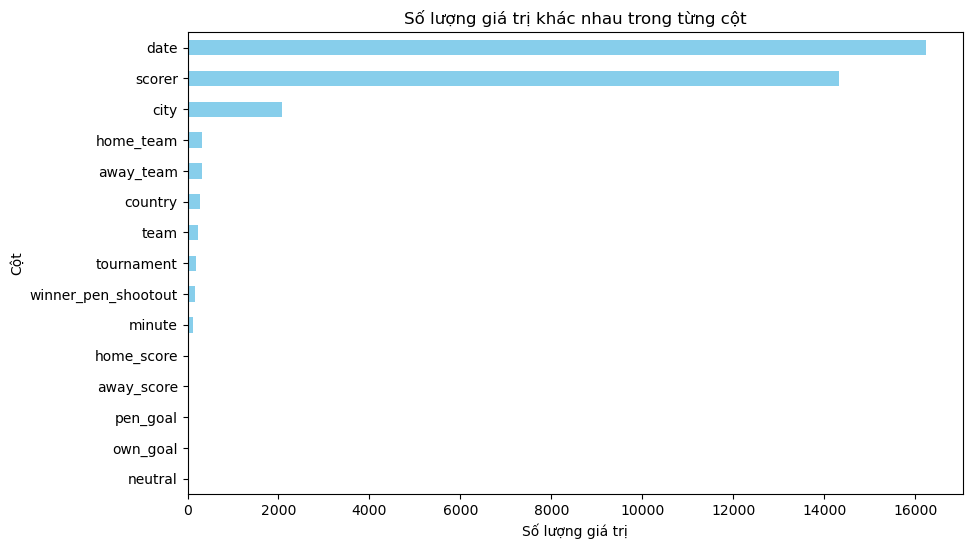

In [34]:
# Biểu đồ thanh hiển thị số lượng giá trị khác nhau trong mỗi cột
unique_values = df.nunique()
unique_values.sort_values().plot(kind='barh', figsize=(10, 6), color='skyblue')

plt.title('Số lượng giá trị khác nhau trong từng cột')
plt.xlabel('Số lượng giá trị')
plt.ylabel('Cột')
plt.show()

**Nhận xét**
- Cột `date` có số lượng giá trị khác nhau cao nhất, vì mỗi trận đấu diễn ra vào các ngày khác nhau, dẫn đến nhiều ngày độc nhất.
- Cột `scorer` có số lượng giá trị gần bằng với cột `date`, điều này gợi ý rằng hầu hết các trận đấu đều có thông tin về cầu thủ ghi bàn.
- Số lượng giá trị khác nhau trong cột `city` ít hơn hẳn so với `date` và `scorer`. Có thể là do nhiều trận đấu được tổ chức ở một số thành phố phổ biến.

#### Kiểm tra giá trị thiếu trong mỗi cột

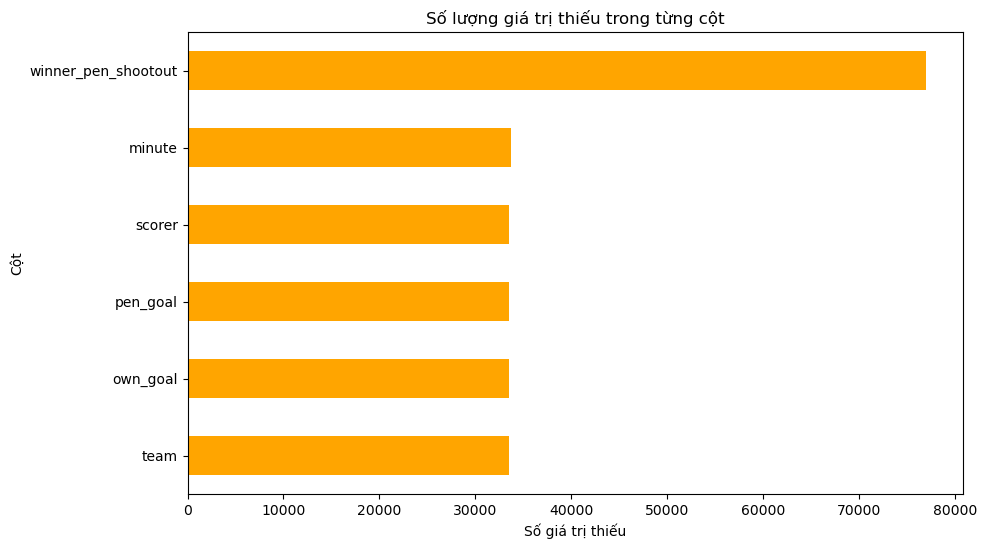

In [ ]:
# Biểu đồ giá trị thiếu trong mỗi cột
missing_values = df.isnull().sum()
missing_values[missing_values > 0].sort_values().plot(kind='barh', figsize=(10, 6), color='orange')

plt.title('Số lượng giá trị thiếu trong từng cột')
plt.xlabel('Số giá trị thiếu')
plt.ylabel('Cột')

plt.show()

**Nhận xét**
- Số lượng giá trị thiếu trong cột `winner_pen_shootout` là cao nhất, vượt xa so với các cột khác.
- Cột `minute`, `scorer`, `pen_goal`, `own_goal`, `team`: các cột này có số lượng giá trị thiếu tương đối đồng đều.
- Đánh giá dữ liệu trên: việc thiếu dữ liệu trong các cột trên có thể ảnh hưởng đến chất lượng phân tích, đặc biệt với winner nhưng nó chỉ chiếm một phần nhỏ so với tổng kích thước tập dữ liệu (rất lớn), nên nó không gây ảnh hưởng nghiêm trọng đến kết quả.

---

## Preprocessing + analyzing data to answer each question

**Câu hỏi 1:**  câu hỏi của mình nha

**Ý nghĩa**: lợi ích khi trả lời câu hỏi này

**Các bước thực hiện**: ý tưởng làm câu hỏi này và nói cách làm

#### Pre-processing

In [111]:
# YOUR CODE HERE (OPTION) 

#### Analyzing to get the answer

In [112]:
# YOUR CODE HERE

#### Your conclusion

YOUR CODE HERE

---

**Câu hỏi 2:**  câu hỏi của mình nha

**Ý nghĩa**: lợi ích khi trả lời câu hỏi này

**Các bước thực hiện**: ý tưởng làm câu hỏi này và nói cách làm

#### Pre-processing

In [113]:
# YOUR CODE HERE (OPTION) 

#### Analyzing to get the answer

In [114]:
# YOUR CODE HERE

#### Conclusion

YOUR CODE HERE

---

**Câu hỏi 3:**  câu hỏi của mình nha

**Ý nghĩa**: lợi ích khi trả lời câu hỏi này

**Các bước thực hiện**: ý tưởng làm câu hỏi này và nói cách làm

#### Pre-processing

In [115]:
# YOUR CODE HERE (OPTION) 

#### Analyzing to get the answer

In [116]:
# YOUR CODE HERE

#### Conclusion

YOUR CODE HERE

---

**Câu hỏi 4:**  câu hỏi của mình nha

**Ý nghĩa**: lợi ích khi trả lời câu hỏi này

**Các bước thực hiện**: ý tưởng làm câu hỏi này và nói cách làm

#### Pre-processing

In [117]:
# YOUR CODE HERE (OPTION) 

#### Analyzing to get the answer

In [118]:
# YOUR CODE HERE

#### Conclusion

YOUR CODE HERE

---

**Câu hỏi 5:**  câu hỏi của mình nha

**Ý nghĩa**: lợi ích khi trả lời câu hỏi này

**Các bước thực hiện**: ý tưởng làm câu hỏi này và nói cách làm

#### Pre-processing

In [119]:
# YOUR CODE HERE (OPTION) 

#### Analyzing to get the answer

In [120]:
# YOUR CODE HERE

#### Conclusion

YOUR CODE HERE

---

**Câu hỏi 6:**  câu hỏi của mình nha

**Ý nghĩa**: lợi ích khi trả lời câu hỏi này

**Các bước thực hiện**: ý tưởng làm câu hỏi này và nói cách làm

#### Pre-processing

In [121]:
# YOUR CODE HERE (OPTION) 

#### Analyzing to get the answer

In [122]:
# YOUR CODE HERE

#### Conclusion

YOUR CODE HERE